In [1]:
import pandas as pd
df2 = pd.read_csv('../data/df2.csv')
df2.head()

,a,b,c,d,e
0,0.039762,0.218517,0.103423,0.957904,x
1,0.937288,0.041567,0.899125,0.977680,y
2,0.780504,0.008948,0.557808,0.797510,x
3,0.672717,0.247870,0.264071,0.444358,z
4,0.053829,0.520124,0.552264,0.190008,y


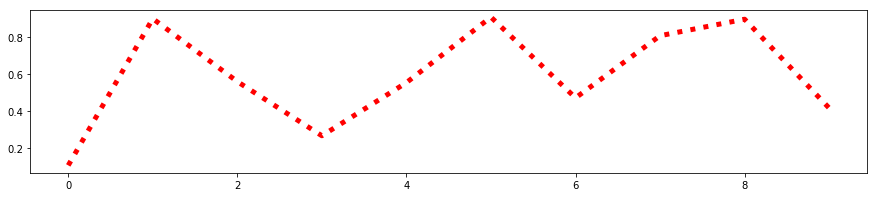

In [2]:
df2['c'].plot.line(figsize=(15, 3), ls=':', c='r', lw=5);

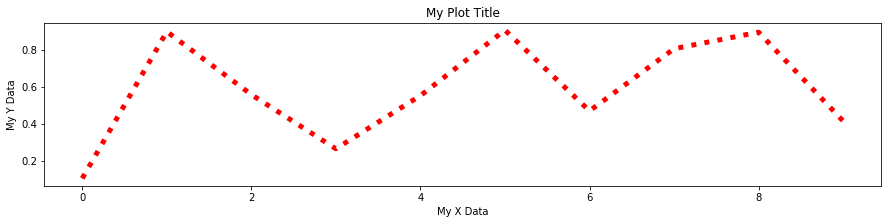

In [3]:
title = "My Plot Title"
xlabel = 'My X Data'
ylabel =  'My Y Data'

ax = df2['c'].plot.line(figsize=(15, 3), ls=':', c='r', lw=5, title=title)
ax.set(xlabel=xlabel, ylabel=ylabel);

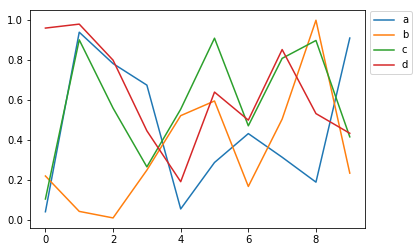

In [4]:
ax = df2.plot()
ax.legend(loc=0, bbox_to_anchor=(1.0, 1.02));

# Datetime Index
## python datetime

In [5]:
from datetime import datetime

my_year = 2020
my_month = 1
my_day = 2
my_hour = 13
my_min = 30
my_sec = 15

In [6]:
my_date = datetime(my_year, my_month, my_day)
# 분과 초를 지정하지 않았지만 파이썬은 자동으로 0으로 할당
my_date 

datetime.datetime(2020, 1, 2, 0, 0)

In [7]:
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_min, my_sec)
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [8]:
# datetime 타입의 객체는 요소들을 분해가능함
print(my_date_time.day)
print(my_date_time.hour)

2
13


In [9]:
# python의 datetime 객체는 numpy의 datetime64와는 다른 타입이다.
type(my_date_time)

datetime.datetime

## Numpy datetime

In [10]:
import numpy as np

In [11]:
# dtype에 'datetime64'를 추가하면 시간 데이터 타입으로 변환이 가능하다.
# datetime[D]에서 D는 요일을 뜻한다.
np.array(['2020-03-15', '2020-03-16', '2020-03-17'],
         dtype='datetime64')

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[D]')

In [12]:
# datetime64에 [Y]나 [s] 등의 시간 단위를 지정하면 그에 맞는 시간 단위를 제공한다.
np.array(['2020-03-15', '2020-03-16', '2020-03-17'],
         dtype='datetime64[Y]')

array(['2020', '2020', '2020'], dtype='datetime64[Y]')

In [13]:
# np.arange에 dtype='datetime64[시간단위]'를 적용하면 stepsize에 맞는 연속된 날짜 배열을 반환
np.arange('2018-06-01', '2018-06-23', 7, dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [14]:
np.arange('1968','1976', dtype='datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'],
      dtype='datetime64[Y]')

## Pandas datetime

In [15]:
import pandas as pd

In [16]:
# pandas는 시계열 데이터에 'DatetimeIndex'라는 특화된 인덱스가 존재함
pd.date_range('2020-01-01', periods=7, freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [17]:
# pandas는 문자열로 형태로 된 시계열 데이터를 읽어낼 수 있다.
# 하지만 형식을 맞추어야 한다.
pd.date_range('Jan 01, 2018', periods=7, freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [18]:
# pd.to_datetime은 문자열 형식으로 된 객체(리스트, 문자열 등)를 시계열 데이터로 변환해준다
pd.to_datetime(['1/2/2018', 'Jan 03, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [19]:
# pandas의 기본 시계열 데이터 형식은 미국식(년/월/일)로 지정되어 있다.
# 만약 데이터가 유럽식 혹은 다른 형식으로 되어 있다면 format을 직접 지정하여 적용할 수 있다.
pd.to_datetime(['2/1/2018', '3/1/2018'], format='%m/%d/%Y')

DatetimeIndex(['2018-02-01', '2018-03-01'], dtype='datetime64[ns]', freq=None)

In [20]:
# 만약 시간 데이터 형식 문자열에 노이즈가 들어가 있더라도 
# format을 통해 DatetimeIndex로 변환이 가능하다.
pd.to_datetime(['2--1--2018', '3--1--2018'], format='%d--%m--%Y')

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [21]:
data = np.random.randn(3,2)
cols = ['A', 'B']
data

array([[ 0.55325796, -0.40936759],
       [ 0.50696834,  1.31398137],
       [ 0.89246427,  0.56667652]])

In [22]:
idx = pd.date_range('2020-01-01', periods=3, freq='D')

df = pd.DataFrame(data, index= idx, columns= cols)
print(df.index)
df

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')


,A,B
2020-01-01,0.553258,-0.409368
2020-01-02,0.506968,1.313981
2020-01-03,0.892464,0.566677


In [23]:
print(df.index.max())
print(df.index.argmax())
print(df.index.min())
print(df.index.argmin())

2020-01-03 00:00:00
2
2020-01-01 00:00:00
0


# Time Resampling

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [24]:
import pandas as pd

df = pd.read_csv('../data/starbucks.csv', index_col='Date')
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [25]:
# df의 index가 날짜 형식이 아닌 문자열 형식임을 알수 있다.
df.index

Index(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=1006)

In [33]:
# index가 날짜 형식이라면 parse_dates를 지정하여 형식을 올바르게 생성할 수 있다. 
df = pd.read_csv('../data/starbucks.csv', 
                 index_col='Date', 
                 parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [34]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [35]:
# daily ---> yearly
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [36]:
# 사용자 정의 함수를 사용하여 resample이 가능하다.
def first_day(entry):
    
    # Is there any entry?
    if len(entry) != 0:
        # If so, Return first entry
        return entry[0]

In [37]:
# 년도별로 첫번째 종가와 거래량을 반환
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


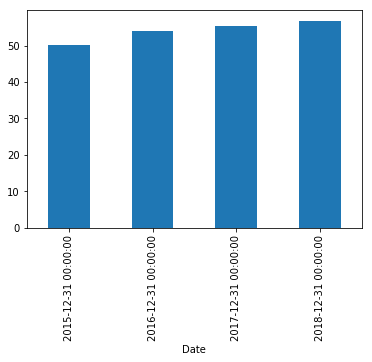

In [38]:
df['Close'].resample('A').mean().plot.bar(color='#1f77b4');

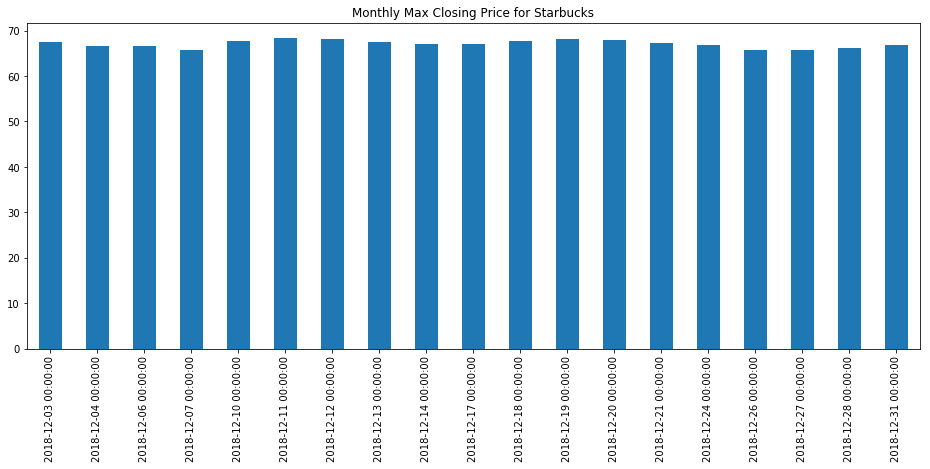

In [39]:
title = 'Monthly Max Closing Price for Starbucks'
df['Close'].resample('M').plot.bar(figsize=(16, 6), title=title, color='#1f77b4');

# Time shift

In [40]:
import pandas as pd

df = pd.read_csv('../data/starbucks.csv', index_col='Date', parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [41]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [42]:
# df.shift()를 사용하면 전체 데이터를 해당 날짜 간격만큼 밀어낼 수 있다.
# 처음 데이터는 NaN값이다. (전 데이터가 존재하지 않기 때문)
df.shift(1).head()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


In [43]:
# 그리고 맨 마지막 데이터(여기선 2018년 12월 31일)는 사라진다.
# 즉 마지막 전 데이터(2018년 12월 28일)가 마지막 데이터(2018년 12월 31일)이 된다.
df.shift(1).tail()

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


In [44]:
# 역시나 처음 5개의 데이터는 결측치로 표기가 되며
# 원 데이터의 마지막 5개의 데이터는 사라지며 5개 이전의 데이터들이 마지막 데이터들이 된다.
df.shift(5).head(10)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,38.0061,6906098.0
2015-01-12,37.2781,11623796.0
2015-01-13,36.9748,7664340.0
2015-01-14,37.8848,9732554.0


In [45]:
# shift 인자로 음수를 사용한다면 양수를 사용했을 때의 반대의 효과를 얻게 된다(위로 밀어낸다.)
df.shift(-4).head()

,Close,Volume
Date,,
2015-01-02,38.4961,13170548.0
2015-01-05,37.2361,27556706.0
2015-01-06,37.4415,10021486.0
2015-01-07,37.7401,11040702.0
2015-01-08,37.5301,9295084.0


In [46]:
df.shift(-4).tail()

,Close,Volume
Date,,
2018-12-24,64.4,7690183.0
2018-12-26,NaN,NaN
2018-12-27,NaN,NaN
2018-12-28,NaN,NaN
2018-12-31,NaN,NaN


In [47]:
# 모든 날짜 인덱스들이 한달의 마지막으로 바뀌었다.
df.shift(periods=1, freq='M').head(5)

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


# Rolling and Expanding

In [48]:
import pandas as pd

df = pd.read_csv('../data/starbucks.csv', index_col='Date', parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


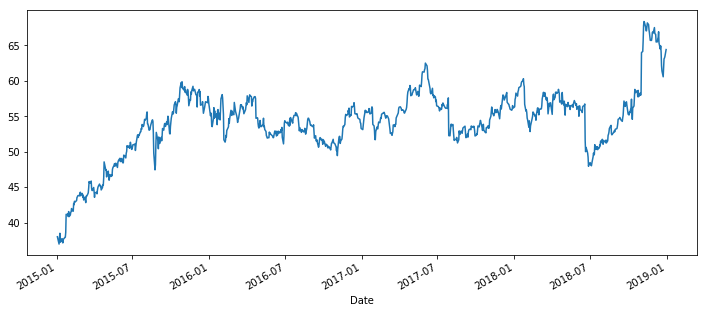

In [49]:
df['Close'].plot(figsize=(12, 5));

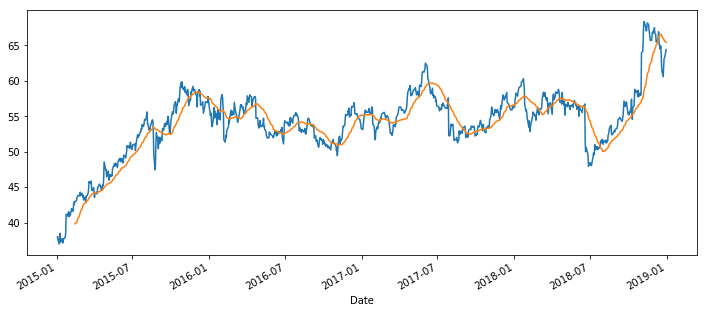

In [50]:
df['Close'].plot(figsize=(12, 5))
df.rolling(window=30).mean()['Close'].plot();

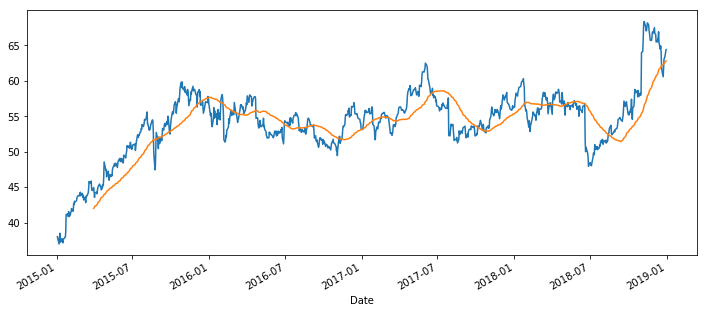

In [51]:
df['Close'].plot(figsize=(12, 5))
df.rolling(window=60).mean()['Close'].plot();

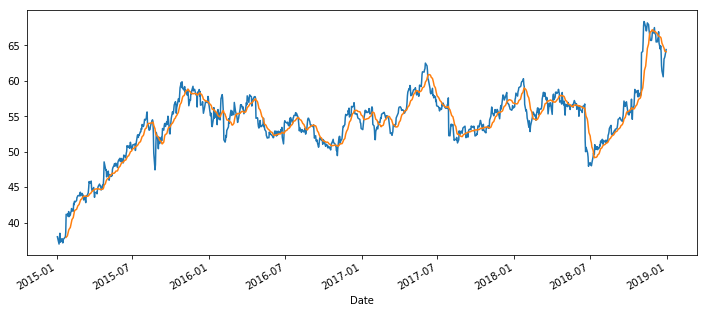

In [52]:
df['Close'].plot(figsize=(12, 5))
df.rolling(window=15).mean()['Close'].plot();

In [53]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df.head()

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN


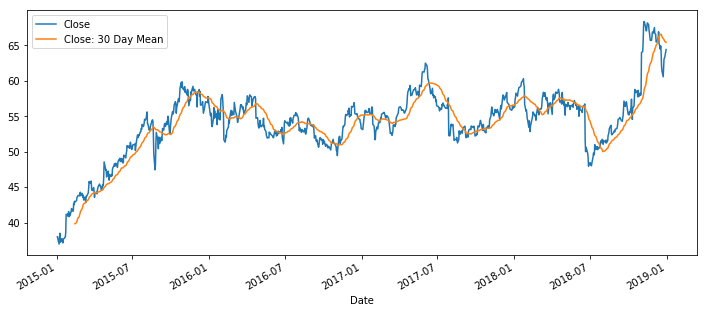

In [54]:
df[['Close', 'Close: 30 Day Mean']].plot(figsize=(12, 5))

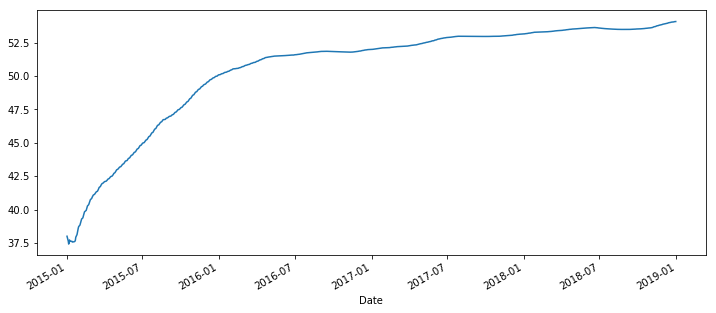

In [56]:
df['Close'].expanding().mean().plot(figsize=(12, 5))